# 1. Inverse transform sampling
Let $(\Omega, \mathcal{A}, P)$ be an unknown probability space. Let $X \colon (\Omega, \mathcal{A}) \to [0,1]$ and $Y \colon \Omega \to \{0,1\}$ be random variables. Suppose we are given the prior probabilities and likelihood densities:
$$
P(Y = 0) = P(Y = 1) = \frac{1}{2}
$$
$$
p(x \mid Y = 0)  = 
\begin{cases} 2 - 2x \quad x \in [0,1] \\
0 \quad \text{else}
\end{cases},\qquad p(x \mid Y = 1) = 
\begin{cases}
2x \quad x \in [0,1] \\
0 \quad \text{else}
\end{cases}
$$
Use inverse transform sampling to sample $X$ for each class $Y \in \{0,1\}$ by following these steps:<br>
* (ii) Implement a function `create_data(N: int):` that, provided and integer N, generates me n realizations of $(X,Y)$ and returns in as an array of shape $(N,2)$. Moreover show that the empirical cummulative distribution functions coincide with the theoretical results calculated in (i). 
* (iv) Confirm experimentally for $x_{t} \in \lbrace 0.05, 0.1, 0.15, \ldots,0.9, 0.95\rbrace$ that the predicted error rates are correct. Repeat each test with 10 different test datasets of the same size $N$ and compute mean and standard deviation of the error. Use the set sizes $N \in \lbrace 1000,10000 \rbrace$. How does the error standard deviation derease with increasing $N$?

### Implementation of the Inverse Transform Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def create_data(N):
    data = np.zeros((N, 2), dtype = np.float32)
    for i in range(N):
        y = np.random.randint(2) # generates a random integer in {0,1} with equal probability
        u = np.random.rand() # generates a equally distributed random float in [0,1)
        if y == 0: 
            x = 1 - np.sqrt(1-u)
        if y == 1: 
            x = np.sqrt(u)
        data[i,:] = (x,y)
    return data

In [3]:
N = 100000
testdata = create_data(N)
X_0 = testdata[testdata[:,1]==0][:,0]
X_1 = testdata[testdata[:,1]==1][:,0]

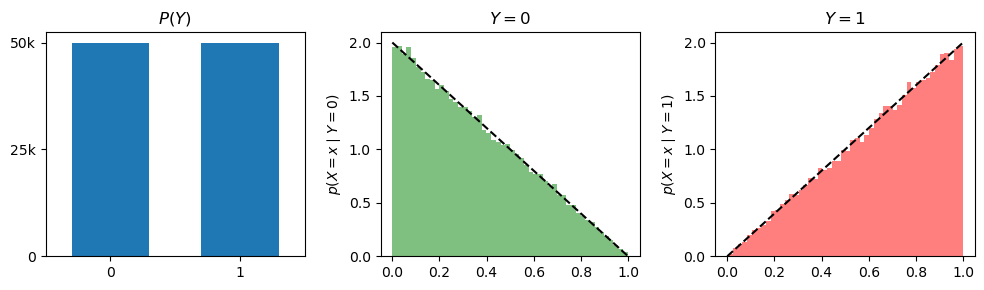

In [4]:
fig = plt.figure(figsize = (10, 3))
plt.subplot(131)

plt.title(r'$P(Y)$')
plt.bar([0, 1], [X_0.size, X_1.size], width = 0.6)
plt.xticks([0,1])
plt.xlim([-0.5, 1.5])
plt.yticks([0,25000,50000], ['0', '25k', '50k'])

plt.subplot(132)
plt.title(r'$Y = 0$')
plt.hist(x=X_0, bins = 50, density = True, facecolor = 'green', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 0)$')
plt.plot([0,1], [2,0], 'k--')

plt.subplot(133)
plt.title(r'$Y = 1$')
plt.hist(x=X_1, bins = 50, density = True, facecolor = 'red', alpha = 0.5)
plt.ylabel(r'$p(X = x \mid Y = 1)$')
plt.plot([0,1], [0,2], 'k--')

fig.tight_layout(); plt.show()

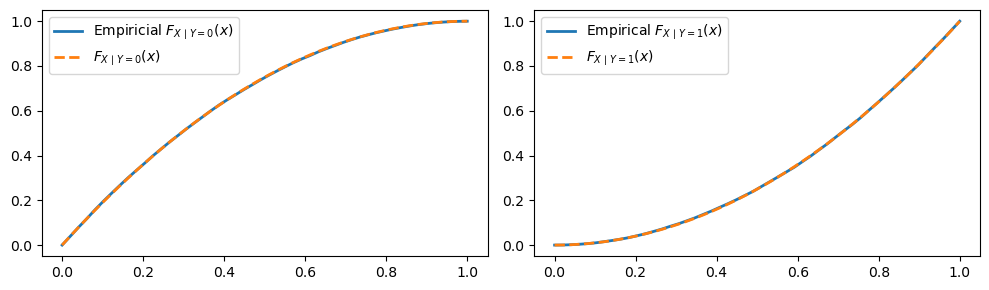

In [5]:
x_domain = np.linspace(0,1,50)
fig = plt.figure(figsize = (10, 3))

def F_0_function(x):
    return 2*x - x**2

def F_1_function(x):
    return x**2

F_0 = F_0_function(x_domain)
F_1 = F_1_function(x_domain)

F_0_empirical = np.zeros(x_domain.size, dtype = np.float32)
F_1_empirical = np.zeros(x_domain.size, dtype = np.float32)

for i in range(x_domain.size):
    F_0_empirical[i] = np.count_nonzero(X_0 < x_domain[i])
    F_1_empirical[i] = np.count_nonzero(X_1 < x_domain[i])

F_0_empirical /= F_0_empirical.max()
F_1_empirical /= F_1_empirical.max()

plt.subplot(121)
plt.plot(x_domain, F_0_empirical, label = r'Empiricial $F_{X\mid Y=0}(x)$', linewidth = 2)
plt.plot(x_domain, F_0, '--', label = r'$F_{X\mid Y=0}(x)$', linewidth = 2)
plt.legend(loc = 'best')

plt.subplot(122)
plt.plot(x_domain, F_1_empirical, label = r'Empirical $F_{X\mid Y=1}(x)$', linewidth = 2)
plt.plot(x_domain, F_1, '--', label = r'$F_{X\mid Y=1}(x)$', linewidth = 2)
plt.legend(loc = 'best')
fig.tight_layout(); plt.show()

### The Classifiers
Confirm experimentally for $x_{t} \in \lbrace 0.05, 0.1, 0.15, \ldots,0.9, 0.95\rbrace$ that the predicted error rates are correct. Repeat each test with 10 different test datasets of the same size $N$ and compute mean and standard deviation of the error. Use the set sizes $N \in \lbrace 1000,10000 \rbrace$. How does the error standard deviation derease with increasing $N$? Use the below defined rules for this task:

In [6]:
def ruleA(x,x_t):
    if x <= x_t:
        return 0
    else: 
        return 1

def ruleB(x,x_t):
    if x <= x_t:
        return 1
    else: 
        return 0
    
def ruleC(x,x_t):
    u = np.random.randint(2)
    return u

def ruleD(x,x_t):
    return 1

def error_rate_A(x_t):
    error_rate = (0.25 + np.square(0.5-x_t))
    return error_rate

def error_rate_B(x_t):
    error_rate = (0.75 - np.square(0.5-x_t))
    return error_rate

def error_rate_C(x_t):
    return 0.5

def error_rate_D(x_t):
    return 0.5

In [7]:
x_t_collection = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
N_collection = [1000, 10000]

# just vehicles to store all the results
collection_A = np.zeros((len(x_t_collection), len(N_collection), 3))
collection_B = np.zeros((len(x_t_collection), len(N_collection), 3))
collection_C = np.zeros((len(x_t_collection), len(N_collection), 3))
collection_D = np.zeros((len(x_t_collection), len(N_collection), 3))

for index_N,N in enumerate(N_collection):
    for index_x_t,x_t in enumerate(x_t_collection):
        collection_A[index_x_t, index_N, 0] = error_rate_A(x_t)
        collection_B[index_x_t, index_N, 0] = error_rate_B(x_t)
        collection_C[index_x_t, index_N, 0] = error_rate_C(x_t)
        collection_D[index_x_t, index_N, 0] = error_rate_D(x_t)
        
        runs_A, runs_B, runs_C, runs_D = [], [], [], []
        for i in range(10):
            data = create_data(N)
            errors_A = 0
            errors_B = 0
            errors_C = 0
            errors_D = 0
            for j in range(N):
                if ruleA(data[j,0], x_t) != data[j,1]:
                    errors_A += 1
                if ruleB(data[j,0], x_t) != data[j,1]:
                    errors_B += 1
                if ruleC(data[j,0], x_t) != data[j,1]:
                    errors_C += 1
                if ruleD(data[j,0], x_t) != data[j,1]:
                    errors_D += 1
            runs_A.append(errors_A/N); runs_B.append(errors_B/N); runs_C.append(errors_C/N); runs_D.append(errors_D/N)
        collection_A[index_x_t, index_N, 1] = np.mean(runs_A)
        collection_B[index_x_t, index_N, 1] = np.mean(runs_B)
        collection_C[index_x_t, index_N, 1] = np.mean(runs_C)
        collection_D[index_x_t, index_N, 1] = np.mean(runs_D)
        collection_A[index_x_t, index_N, 2] = np.std(runs_A)
        collection_B[index_x_t, index_N, 2] = np.std(runs_B)
        collection_C[index_x_t, index_N, 2] = np.std(runs_C)
        collection_D[index_x_t, index_N, 2] = np.std(runs_D)

In [8]:
for index_N, N in enumerate(N_collection):
    print("For N = ", N)
    display(pd.DataFrame(
            data = collection_A[:, index_N, :],
            index = x_t_collection,
            columns = ['error_rate', 'mean', 'std']
        ))
    display(pd.DataFrame(
            data = collection_B[:, index_N, :],
            index = x_t_collection, 
            columns = ['error_rate', 'mean', 'std']
        ))
    display(pd.DataFrame(
            data = collection_C[:, index_N, :],
            index = x_t_collection,
            columns = ['error_rate', 'mean', 'std']
        ))
    display(pd.DataFrame(
            data = collection_D[:, index_N, :],
            index = x_t_collection,
            columns = ['error_rate', 'mean', 'std']
        ))

For N =  1000


,error_rate,mean,std
0.05,0.4525,0.4548,0.016833
0.10,0.4100,0.4059,0.016078
0.15,0.3725,0.3713,0.015969
0.20,0.3400,0.3364,0.015147
0.25,0.3125,0.3159,0.019034
0.30,0.2900,0.2869,0.017294
0.35,0.2725,0.2648,0.013497
0.40,0.2600,0.2528,0.009600
0.45,0.2525,0.2496,0.013749
0.50,0.2500,0.2523,0.009706


,error_rate,mean,std
0.05,0.5475,0.5452,0.016833
0.10,0.5900,0.5941,0.016078
0.15,0.6275,0.6287,0.015969
0.20,0.6600,0.6636,0.015147
0.25,0.6875,0.6841,0.019034
0.30,0.7100,0.7131,0.017294
0.35,0.7275,0.7352,0.013497
0.40,0.7400,0.7472,0.009600
0.45,0.7475,0.7504,0.013749
0.50,0.7500,0.7477,0.009706


,error_rate,mean,std
0.05,0.5,0.5027,0.015453
0.10,0.5,0.4952,0.012262
0.15,0.5,0.4962,0.019707
0.20,0.5,0.4984,0.012126
0.25,0.5,0.4897,0.016835
0.30,0.5,0.5087,0.011671
0.35,0.5,0.4979,0.014152
0.40,0.5,0.5073,0.014185
0.45,0.5,0.5027,0.016187
0.50,0.5,0.4980,0.018423


,error_rate,mean,std
0.05,0.5,0.5004,0.013328
0.10,0.5,0.4988,0.016588
0.15,0.5,0.4978,0.018454
0.20,0.5,0.4992,0.017022
0.25,0.5,0.5068,0.019203
0.30,0.5,0.4979,0.005430
0.35,0.5,0.4987,0.018504
0.40,0.5,0.5044,0.018969
0.45,0.5,0.5072,0.012560
0.50,0.5,0.4948,0.016461


For N =  10000


,error_rate,mean,std
0.05,0.4525,0.45214,0.004479
0.10,0.4100,0.41016,0.005055
0.15,0.3725,0.37012,0.005206
0.20,0.3400,0.33771,0.005076
0.25,0.3125,0.31244,0.003634
0.30,0.2900,0.28945,0.004655
0.35,0.2725,0.27300,0.004814
0.40,0.2600,0.26088,0.004126
0.45,0.2525,0.25241,0.004580
0.50,0.2500,0.25271,0.004680


,error_rate,mean,std
0.05,0.5475,0.54786,0.004479
0.10,0.5900,0.58984,0.005055
0.15,0.6275,0.62988,0.005206
0.20,0.6600,0.66229,0.005076
0.25,0.6875,0.68756,0.003634
0.30,0.7100,0.71055,0.004655
0.35,0.7275,0.72700,0.004814
0.40,0.7400,0.73912,0.004126
0.45,0.7475,0.74759,0.004580
0.50,0.7500,0.74729,0.004680


,error_rate,mean,std
0.05,0.5,0.50127,0.002870
0.10,0.5,0.50230,0.001733
0.15,0.5,0.49836,0.004511
0.20,0.5,0.50197,0.003231
0.25,0.5,0.50027,0.004233
0.30,0.5,0.50097,0.004189
0.35,0.5,0.50029,0.003434
0.40,0.5,0.50257,0.004879
0.45,0.5,0.50108,0.005429
0.50,0.5,0.49823,0.003529


,error_rate,mean,std
0.05,0.5,0.50016,0.004383
0.10,0.5,0.49970,0.004934
0.15,0.5,0.49792,0.003886
0.20,0.5,0.49645,0.004109
0.25,0.5,0.49711,0.005074
0.30,0.5,0.50005,0.003734
0.35,0.5,0.50145,0.004219
0.40,0.5,0.50072,0.005417
0.45,0.5,0.49908,0.004865
0.50,0.5,0.49915,0.005405


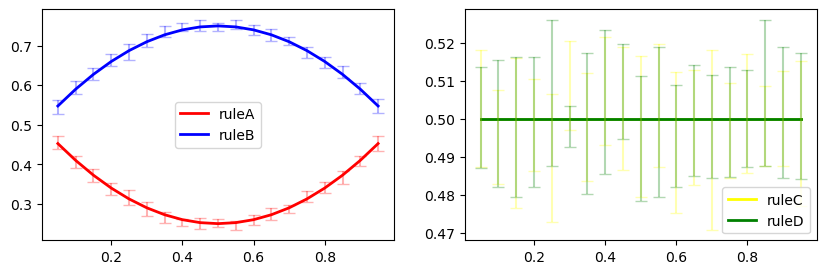

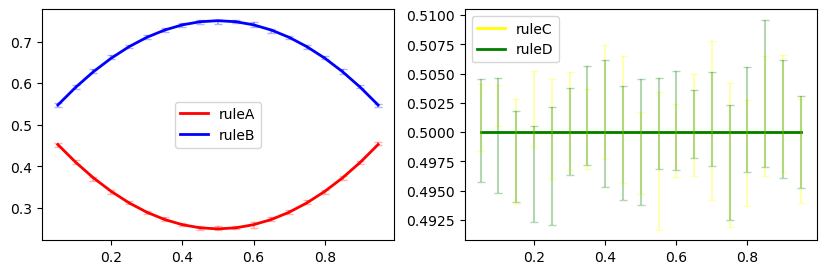

In [9]:
x_domain = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])

for index_N, N in enumerate(N_collection):
    fig = plt.figure(figsize = (10, 3))

    plt.subplot(121)
    plt.plot(x_domain, error_rate_A(x_domain), label = r'ruleA', linewidth = 2, color = 'red')
    plt.plot(x_domain, error_rate_B(x_domain), label = r'ruleB', linewidth = 2, color = 'blue')
    plt.legend()
    
    plt.errorbar(x_domain, collection_A[:, index_N, 1], collection_A[:, index_N, 2], fmt='none', color = 'red', capsize = 4-index_N, alpha = 0.3)
    plt.errorbar(x_domain, collection_B[:, index_N, 1], collection_B[:, index_N, 2], fmt='none', color = 'blue', capsize = 4-index_N, alpha = 0.3)

    plt.subplot(122)
    help_array = 0.5 * np.ones(shape = x_domain.shape)
    plt.plot(x_domain, help_array, label = r'ruleC', linewidth = 2, color = 'yellow')
    plt.plot(x_domain, help_array, label = r'ruleD', linewidth = 2, color = 'green')
    plt.legend()
    
    plt.errorbar(x_domain, collection_C[:, index_N, 1], collection_C[:, index_N, 2], fmt='none', color = 'yellow', capsize = 4-index_N, alpha = 0.3)
    plt.errorbar(x_domain, collection_D[:, index_N, 1], collection_D[:, index_N, 2], fmt='none', color = 'green', capsize = 4-index_N, alpha = 0.3)